In [5]:
%load_ext pycodestyle_magic


The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [6]:
%pycodestyle_on

# Исследовательский проект
### Тема: исследование экзопланет
Выполнил: Опарин Роман

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data.csv', comment="#", sep=',', low_memory=False)

In [4]:
df.head()

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,NaN,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,NaN,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,...,NaN,2023-09-19,2023-08,2023-09-19,2.0,1.0,2.0,0.0,0.0,0.0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,NaN,2018-09-04,2017-03,2018-09-06,0.0,1.0,1.0,0.0,0.0,0.0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25,2011-08,2014-07-23,0.0,1.0,1.0,0.0,0.0,0.0


За все время было открыто **27125** экзопланет

### Какой телескоп открыл больше всего экзопланет?

In [81]:
telescope_counts = df['disc_telescope'].value_counts()
(telescope_counts.idxmax(), telescope_counts.max())

('0.95 m Kepler Telescope', 23122)

 Телескоп Kepler открыл больше всего экзопланет, а именно **23122**

### Сколько открыто экзопланет?

In [85]:
df.shape

(27125, 287)

### Сколько планет открыто в каждом году?

In [40]:
df.groupby(['disc_year'])['disc_year'].count()

disc_year
1995       5
1996      29
1998      38
1999      67
2000      72
2001      57
2002     130
2003      80
2004     118
2005     150
2006      87
2007     175
2008     214
2009     283
2010     387
2011     904
2012     529
2013     661
2014    8578
2015     802
2016    8229
2017     405
2018     822
2019     314
2020     572
2021    2403
2022     452
2023     557
2024       5
Name: disc_year, dtype: int64

### Какой из типов детектирования экзопланет самый эффективный?

In [49]:
detection_method_counts = df['discoverymethod'].value_counts()
(detection_method_counts.idxmax(), detection_method_counts.max())

('Transit', 24354)

Самый эффективный метод детектирования за весь период набдюдений -- Тразитный, он открыл **24354** экзопланеты

In [88]:
df.groupby(['disc_year'])["discoverymethod"].max()

disc_year
1995              Radial Velocity
1996              Radial Velocity
1998              Radial Velocity
1999              Radial Velocity
2000              Radial Velocity
2001              Radial Velocity
2002              Radial Velocity
2003              Radial Velocity
2004              Radial Velocity
2005              Radial Velocity
2006                      Transit
2007                      Transit
2008                      Transit
2009                      Transit
2010                      Transit
2011    Transit Timing Variations
2012    Transit Timing Variations
2013    Transit Timing Variations
2014    Transit Timing Variations
2015                      Transit
2016    Transit Timing Variations
2017    Transit Timing Variations
2018    Transit Timing Variations
2019                      Transit
2020    Transit Timing Variations
2021                      Transit
2022    Transit Timing Variations
2023    Transit Timing Variations
2024              Radial Velocity
Name

Также стоит отметить, что до 2006 года новые экзопланеты открывали с помощью Radial Velocity

### Средний орбитальный период

In [5]:
df['pl_orbper'].mean()

16588.99424172768

Средний орбитальный период 16588 дней

### Максимальный орбитальный период

In [83]:
df['pl_orbper'].max()

402000000.0

### Средний орбитальный период по каждому году

In [92]:
df.groupby(['disc_year'])['pl_orbper'].mean()

disc_year
1995         4.230530
1996       382.316613
1998        85.052576
1999       229.094159
2000       502.091638
2001       823.392299
2002      1340.061249
2003      1105.584991
2004       460.571120
2005       709.770923
2006       878.909476
2007       303.571863
2008      4768.630965
2009       974.662513
2010       303.897541
2011       141.122563
2012       324.032265
2013        86.721418
2014        36.908176
2015       161.001497
2016        43.858278
2017       103.986257
2018       190.838596
2019       962.999267
2020        61.346059
2021    172775.425604
2022      3208.435399
2023       547.467518
2024       213.741460
Name: pl_orbper, dtype: float64

###  Растояние до экопланет

In [7]:
df["sy_dist"].max()

8240.0

Самая далекая из открытых планет, находится на расстояянии  - **8240** парсек

In [8]:
df["sy_dist"].min()

3.29

Самая ближайшая из открытых планет, находится на расстоянии - 3,29 парсек 

#### Растояние до планет в разрезе лет

In [76]:
df.groupby(['disc_year'])["sy_dist"].max()

disc_year
1995      15.4614
1996      21.1397
1998      45.9548
1999      62.7674
2000      84.4069
2001      81.3795
2002     122.5360
2003     100.5760
2004     151.1690
2005     497.8230
2006     190.3740
2007     925.2140
2008     787.9090
2009    1539.7100
2010    2305.0100
2011    1819.1700
2012    1366.0700
2013    2213.1900
2014    2257.3200
2015    1878.3100
2016    2921.9900
2017    1188.5400
2018    7010.0000
2019    7481.0000
2020    7300.0000
2021    7470.0000
2022    8240.0000
2023    7710.0000
2024      26.7909
Name: sy_dist, dtype: float64

<Axes: xlabel='disc_year'>

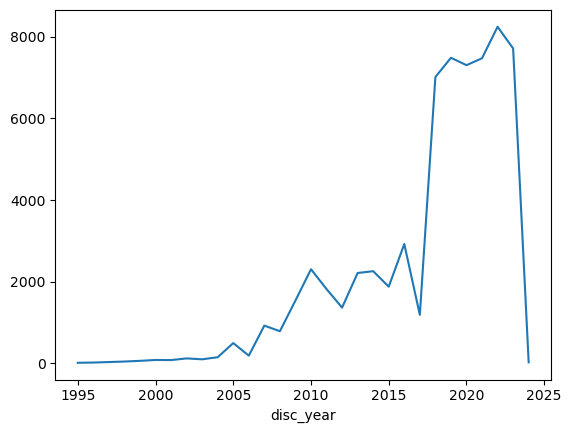

In [75]:
df.groupby(['disc_year'])["sy_dist"].max().plot()

Нетрудно заметить, что с каждым годом открывают все более далекие планеты

Резкое падение в 2024 году можно объяснить, тем что год только начался